# ESTIMATING "RELATIVE PHYSICAL FATIGUE INDEX" OF PLAYERS USING ICE HOCKEY METRICS

#### **Objective:** To develop an application that enables coaches to input match data and obtain instant feedback on potential fatigue levels,based on the dataset's metrics.

#### **Functionality:** Upload data files and obtain instant feedback on potential fatigue levels.

#### **Applications:**

1. **Player Management and Rotation:**
   Use the Fatigue Index (FI) to guide real-time player rotation decisions, optimizing performance and minimizing injury risks.

2. **Injury Prevention in Training:**
   Incorporate FI to tailor training intensity and recovery, reducing the likelihood of player injuries.

3. **Performance Analysis and Strategy:**
   Integrate FI with performance metrics to refine game strategies, making informed in-game decisions for optimal outcomes.


### DATA LOADING AND PREPROCESSING


In [55]:
# Import required Libraries
import pandas as pd

import matplotlib.pyplot as plt

In [56]:
# # We change the delimiter to ; and save the file for ease of use
# df_lugano.to_csv("lugano.csv", sep=",", index=False)
# df_lugano.to_csv("zsc.csv", sep=",", index=False)

In [57]:
# Load the datasets into Pandas DataFrame
df_lugano = pd.read_csv("lugano.csv", encoding="ISO-8859-1")
# df_zsc = pd.read_csv("zsc.csv", encoding="ISO-8859-1")

# Print the first 5 rows of the datasets
df_lugano.head()

,Group name,League ID,Description,Session ID,Types,Session end (Local timezone),Session end date (Local timezone),Session end date (UTC),Session end time (Local timezone),Session end time (UTC),...,Sprints / min (medium),Sprints / min (high),Sprints / min (very high),Sprints / min (near max),Turns,Sharp Turns,Wide Turns,Turns / min,Sharp Turns / min,Wide Turns / min
0,Defense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"0,35","0,06",0,0,33,10,23,"1,91","0,58","1,33"
1,Offense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"1,04","0,7","0,17",0,56,9,47,"4,88","0,78","4,09"
2,Offense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"0,58","0,32","0,26",0,48,6,42,"3,09","0,39","2,7"
3,Offense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"0,86","0,4","0,12",0,58,12,46,"3,34","0,69","2,65"
4,Defense,NaN,vs Lugano,194,Match,16.11.2022 22:09:47,16.11.2022,16.11.2022,22:09:47,21:09:47,...,"1,96",0,0,0,2,0,2,"1,31",0,"1,31"


In [58]:
# List of columns to keep in the dataset
columns_to_keep = [
    "Group name",
    "Position",
    "Description",
    "Duration (s)",
    "Distance (m)",
    "Time on Ice (s)",
    "High Metabolic Power Distance (m)",
    "Mechanical Intensity",
]

In [59]:
# Create a new DataFrame with only the recommended columns to keep
df_imp_lugano = df_lugano[columns_to_keep]
# print(df_imp_lugano)

In [60]:
# add a new column called player id to the dataframe and fill it with the player id starting from 1 using .loc as the first column

# CHANGE PLAYER NOTATION TO ALPHABETS

df_imp_lugano.insert(loc=0, column="Player ID", value=range(1, 1 + len(df_imp_lugano)))

df_imp_lugano.head(50)

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,"45,94"
1,2,Offense,F,vs Lugano,8836,2881,689,1724,"42,85"
2,3,Offense,F,vs Lugano,8836,3586,932,2090,"46,12"
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,"44,38"
4,5,Defense,D,vs Lugano,8836,354,92,179,"44,95"
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,"41,27"
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,"19,29"
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,"44,56"
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,"38,62"
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,"45,25"


In [61]:
# Check the data types of the columns
df_imp_lugano.dtypes

Player ID                             int64
Group name                           object
Position                             object
Description                          object
Duration (s)                          int64
Distance (m)                          int64
Time on Ice (s)                       int64
High Metabolic Power Distance (m)     int64
Mechanical Intensity                 object
dtype: object

In [62]:
# Convert the data type of the column mechanical intensity from string to float

df_imp_lugano["Mechanical Intensity"] = (
    df_imp_lugano["Mechanical Intensity"].str.replace(",", ".").astype(float)
)

# Check the data types of the columns
df_imp_lugano.dtypes

C:\Users\samue\AppData\Local\Temp\ipykernel_10056\649008270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano["Mechanical Intensity"] = (


Player ID                              int64
Group name                            object
Position                              object
Description                           object
Duration (s)                           int64
Distance (m)                           int64
Time on Ice (s)                        int64
High Metabolic Power Distance (m)      int64
Mechanical Intensity                 float64
dtype: object

### CONCEPTUAL FRAMEWORK AND METHODOLOGY

Given the anonymized nature and the small sample size of our dataset, combined with numerous variables at play, we've made certain assumptions to ensure its suitable for our use-case. Here’s our approach to understanding player fatigue:

1. **Picking Player Data:**
   Due to lack of player identification data, we had to infer that first 21 rows represent individual player data. This is based on the understanding that a hockey team typically consists of 20 players. This selection ensures we capture data for each unique player.

2. **Identifying Player Roles:**
   We assess the 'Position' column to differentiate between a forward (FW), defenseman (D) and Goalkeeper. The roles they play on the ice rink might result in different fatigue levels.

3. **Data Segmentation:**
   With hundreds of variables present, we narrow down and segment data by recommended metrics from the icehockey club. This targeted analysis aids in the precise estimation of the Fatigue Index (FI).

4. **Developing the Fatigue Formula:**
   Using a combination of the dataset metrics, we create a formula that captures the aspects of player fatigue. This formula is designed to be sensitive to player roles, game dynamics, and other key factors.

5. **Fatigue Estimation:**
   Using the curated data from the previous steps, we derive the Fatigue Index (FI).

6. **Visualization:**
   We design a clear and easy-to-understand graphic to show the fatigue levels. This helps coaches quickly see and understand player tiredness.


In [63]:
# As we want only unique player data, we select only the first 21 rows of the dataframe
# We infer that because an ice hockey team typically consists of 20 players, including 2 goaltenders and 18 skaters.
# and the the proportion of forwards to defensemen
df_imp_lugano_21 = df_imp_lugano.iloc[0:21, :]
df_imp_lugano_21

,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,45.94
1,2,Offense,F,vs Lugano,8836,2881,689,1724,42.85
2,3,Offense,F,vs Lugano,8836,3586,932,2090,46.12
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,44.38
4,5,Defense,D,vs Lugano,8836,354,92,179,44.95
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,41.27
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,44.56
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,38.62
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,45.25


In [64]:
# Check if any NA in Each Row for the first 21 rows
df_imp_lugano_21.isnull().sum(axis=1)
# df_imp_lugano.isna().any(axis=1)

# We see there are no NA values in the first 21 rows of the dataframe

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [65]:
# Calculate the ratio of forwards to defensemen using position column

df_imp_lugano_21["Position"].value_counts()

Position
F             14
D              6
Goalkeeper     1
Name: count, dtype: int64

In [66]:
# Calculate ratio of F to D
F = df_imp_lugano_21["Position"].value_counts()[0]
D = df_imp_lugano_21["Position"].value_counts()[1]
ratio = F / D

# print ratio as a fraction

print(ratio)

2.3333333333333335


C:\Users\samue\AppData\Local\Temp\ipykernel_10056\2322698909.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F = df_imp_lugano_21["Position"].value_counts()[0]
C:\Users\samue\AppData\Local\Temp\ipykernel_10056\2322698909.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  D = df_imp_lugano_21["Position"].value_counts()[1]


### CREATING A RELATIVE FATIGUE LEVEL FORMULA

- Typically involves empirical research, biomechanics, and physiological considerations.
- However, we propose a simple, hypothetical formula to estimate fatigue.
- DISCLAIMER : This is a rough estimation and not based on scientific research.
- Using the important metrics recommended by the Ice Hockey Club & Professor Martin Rumo, we attempt to create a formula that can be used to estimate fatigue levels.


#### Relative Fatigue Index (RFI) = [A * (Time on ice/ Match Duration) + B * (High Metabolic Power Distance / Total Distance) + C * (Mechanical Intensity)]

- TIME FACTOR : Percentage of Time spent on Ice. Here, the idea is simple: the more time a player spends on the ice, the more fatigued they're likely to be.

- DISTANCE OR INTENSITY FACTOR : Percentage of the distance covered at high intensities. It's a straightforward indicator of how hard a player pushed themselves relative to their overall activity. It is the distance covered at high metabolic power divided by the total distance covered.

- MECHANICAL OR LOAD INTENSITY : How intense a player's session was concerning accelerations and decelerations.It models the intensity of a session or phase and provides important information about its impact on the lower limbs. It is the Mechanical Load divided by the total time in minutes.

- A, B, and C: Weights assigned to each of the factors. These weights are determined by the coach based on the importance of each factor in the context of the team's strategy and the coach's philosophy.


#### NORMALIZE MECANICAL INTENSITY

In [67]:
# First we need to normalize the Mechanical Intensity column, so that the values are between 0 and 1
# This is to make sure that it can be added to TIME FACTOR, and DISTANCE FACTOR which are ratios in the next step
# With historical data, from the clubs, min and max intensities can be adjusted further in the future to normalize the intensity

min_val = df_imp_lugano_21["Mechanical Intensity"].min()
max_val = df_imp_lugano_21["Mechanical Intensity"].max()

df_imp_lugano_21["Normalized Mechanical Intensity"] = (
    df_imp_lugano_21["Mechanical Intensity"] - min_val
) / (max_val - min_val)

df_imp_lugano_21

C:\Users\samue\AppData\Local\Temp\ipykernel_10056\3016819878.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano_21["Normalized Mechanical Intensity"] = (


,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity
0,1,Defense,D,vs Lugano,8836,3163,1038,1287,45.94,0.961371
1,2,Offense,F,vs Lugano,8836,2881,689,1724,42.85,0.871624
2,3,Offense,F,vs Lugano,8836,3586,932,2090,46.12,0.966599
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,44.38,0.916062
4,5,Defense,D,vs Lugano,8836,354,92,179,44.95,0.932617
5,6,Defense,D,vs Lugano,8836,5087,1360,2501,41.27,0.825733
6,7,Goalies,Goalkeeper,vs Lugano,8836,1066,4007,7,19.29,0.187337
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,44.56,0.921290
8,9,Offense,F,vs Lugano,8836,4009,1239,2066,38.62,0.748766
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,45.25,0.941330


#### CREATE RELATIVE FATIGUE INDEX (RFI) FUNCTION

In [68]:
def relative_fatigue_index(df, A=1, B=1, C=1):
    """This function calculates the fatigue index for each player."""
    return (
        A * (df["Time on Ice (s)"] / df["Duration (s)"])
        + B * df["High Metabolic Power Distance (m)"] / df["Distance (m)"]
    ) + C * df["Normalized Mechanical Intensity"]

In [69]:
# test the function
A = 1
B = 1
C = 1

relative_fatigue_index(df_imp_lugano_21, A, B, C)

0     1.485737
1     1.548003
2     1.654899
3     1.538095
4     1.448679
5     1.471295
6     0.647389
7     1.641736
8     1.404328
9     1.525707
10    1.669477
11    0.951123
12    1.532141
13    0.001019
14    1.403397
15    1.548994
16    1.517963
17    1.519416
18    1.453339
19    1.443519
20    1.616113
dtype: float64

#### NORMALIZED FATIGUE INDEX CALCULATION

In [70]:
# 1. Compute the intermediate fatigue index for each row
df_imp_lugano_21["Relative Fatigue Index"] = df_imp_lugano_21.apply(
    relative_fatigue_index, axis=1
)

# 2. Normalize this intermediate fatigue index
min_fatigue = df_imp_lugano_21["Relative Fatigue Index"].min()
max_fatigue = df_imp_lugano_21["Relative Fatigue Index"].max()

# +1 to make sure the values are between 1 and 2
df_imp_lugano_21["Normalized Fatigue Index"] = (
    df_imp_lugano_21["Relative Fatigue Index"] - min_fatigue
) / (max_fatigue - min_fatigue) + 1

# Sort the dataframe by the final fatigue index in descending order
# This will give us the most fatigued player at the top and the least fatigued player at the bottom

df_imp_lugano_21_sorted = df_imp_lugano_21.sort_values(
    by="Normalized Fatigue Index", ascending=False
)

df_imp_lugano_21_sorted

# REMOVE INTERMEDIATE FATIGUE INDEX, IF NOT REQUIRED.

C:\Users\samue\AppData\Local\Temp\ipykernel_10056\4088172703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano_21["Relative Fatigue Index"] = df_imp_lugano_21.apply(
C:\Users\samue\AppData\Local\Temp\ipykernel_10056\4088172703.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_lugano_21["Normalized Fatigue Index"] = (


,Player ID,Group name,Position,Description,Duration (s),Distance (m),Time on Ice (s),High Metabolic Power Distance (m),Mechanical Intensity,Normalized Mechanical Intensity,Relative Fatigue Index,Normalized Fatigue Index
10,11,Offense,F,vs Lugano,8836,4935,1070,3228,43.63,0.894278,1.669477,2.000000
2,3,Offense,F,vs Lugano,8836,3586,932,2090,46.12,0.966599,1.654899,1.991262
7,8,Offense,F,vs Lugano,8836,4683,1162,2758,44.56,0.921290,1.641736,1.983373
20,21,Offense,F,vs Lugano,8836,2278,545,1263,47.27,1.000000,1.616113,1.968016
15,16,Offense,F,vs Lugano,8836,3174,823,1764,43.83,0.900087,1.548994,1.927788
1,2,Offense,F,vs Lugano,8836,2881,689,1724,42.85,0.871624,1.548003,1.927194
3,4,Offense,F,vs Lugano,8836,3881,1043,1956,44.38,0.916062,1.538095,1.921256
12,13,Defense,F,vs Lugano,8836,3498,936,1689,45.32,0.943363,1.532141,1.917687
9,10,Defense,D,vs Lugano,8836,4383,1307,1913,45.25,0.941330,1.525707,1.913831
17,18,Offense,F,vs Lugano,8836,2621,732,1279,45.50,0.948591,1.519416,1.910060


#### CREATE FUNCTION TO CALCULATE THE FATIGUE INDEX FOR EACH PLAYER

In [71]:
def relative_fatigue_index(df, A=1, B=1, C=1):
    """This function calculates the fatigue index for each player."""
    return (
        A * (df["Time on Ice (s)"] / df["Duration (s)"])
        + B * df["High Metabolic Power Distance (m)"] / df["Distance (m)"]
    ) + C * df["Normalized Mechanical Intensity"]


# test the function
A = 1
B = 1
C = 1

relative_fatigue_index(df_imp_lugano_21, A, B, C)

0     1.485737
1     1.548003
2     1.654899
3     1.538095
4     1.448679
5     1.471295
6     0.647389
7     1.641736
8     1.404328
9     1.525707
10    1.669477
11    0.951123
12    1.532141
13    0.001019
14    1.403397
15    1.548994
16    1.517963
17    1.519416
18    1.453339
19    1.443519
20    1.616113
dtype: float64

#### COLOR CATEGORIZATION OF FATIGUE LEVELS

In [72]:
# MANUAL THRESHOLD BASED CATEGORIZATION OF FATIGUE INDEX

# Fixed thresholds
high_threshold = 1.57
low_threshold = 1


# Categorize values based on manual thresholds
df_imp_lugano_21_sorted["Fatigue Category"] = pd.cut(
    df_imp_lugano_21_sorted["Relative Fatigue Index"],
    [0, low_threshold, high_threshold, 2],  # Explicitly using 2 as max value
    labels=["Low", "Medium", "High"],
    include_lowest=True,
)

# Display the results
print(
    df_imp_lugano_21_sorted  # [["Player ID", "Relative Fatigue Index", "Fatigue Category"]]
)

    Player ID Group name    Position Description  Duration (s)  Distance (m)  \
10         11    Offense           F   vs Lugano          8836          4935   
2           3    Offense           F   vs Lugano          8836          3586   
7           8    Offense           F   vs Lugano          8836          4683   
20         21    Offense           F   vs Lugano          8836          2278   
15         16    Offense           F   vs Lugano          8836          3174   
1           2    Offense           F   vs Lugano          8836          2881   
3           4    Offense           F   vs Lugano          8836          3881   
12         13    Defense           F   vs Lugano          8836          3498   
9          10    Defense           D   vs Lugano          8836          4383   
17         18    Offense           F   vs Lugano          8836          2621   
16         17    Offense           F   vs Lugano          8836          4759   
0           1    Defense           D   v

In [73]:
# # QUANTILE BASED CATEGORIZATION OF FATIGUE INDEX

# # Calculate quantiles
# q33 = df_imp_lugano_21_sorted["Relative Fatigue Index"].quantile(0.33)
# q66 = df_imp_lugano_21_sorted["Relative Fatigue Index"].quantile(0.66)

# # Categorize values
# df_imp_lugano_21_sorted["Fatigue Category"] = pd.cut(
#     df_imp_lugano_21_sorted["Relative Fatigue Index"],
#     [0, q33, q66, df_imp_lugano_21_sorted["Relative Fatigue Index"].max()],
#     labels=["Low", "Medium", "High"],
#     include_lowest=True,
# )

# print(
#     df_imp_lugano_21_sorted[["Player ID", "Relative Fatigue Index", "Fatigue Category"]]
# )

#### VISUALIZATION OF FATIGUE INDEX FOR EACH PLAYER

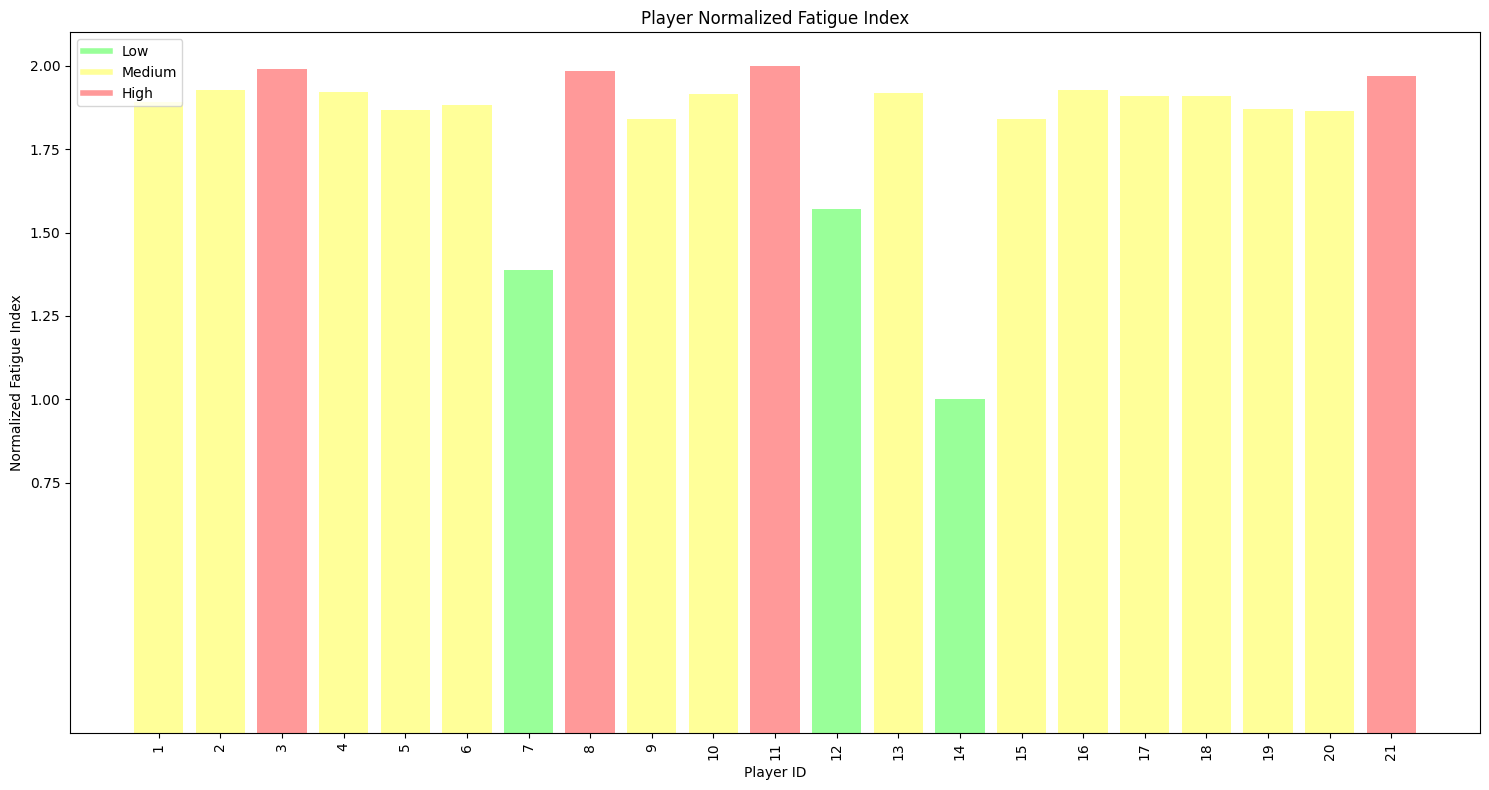

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort by 'Normalized Fatigue Index' directly
df_sorted = df_imp_lugano_21_sorted.sort_values(by=["Normalized Fatigue Index"])

# Color mapping
color_mapping = {
    "High": "#FF9999",  # Pastel Red
    "Medium": "#FFFF99",  # Pastel Yellow
    "Low": "#99FF99",  # Pastel Green
}
colors = df_sorted["Fatigue Category"].map(color_mapping).tolist()

# Create a custom list for y-axis ticks
y_ticks = [
    x * 0.25
    for x in range(
        int(0.75 / 0.25), int(df_sorted["Normalized Fatigue Index"].max() / 0.25) + 1
    )
]

# Plot
plt.figure(figsize=(15, 8))
bars = plt.bar(
    df_sorted["Player ID"], df_sorted["Normalized Fatigue Index"], color=colors
)
plt.yticks(y_ticks)
plt.xticks(df_sorted["Player ID"], rotation=90)  # x-axis labels vertical
plt.title("Player Normalized Fatigue Index")
plt.ylabel("Normalized Fatigue Index")
plt.xlabel("Player ID")

# Create a custom legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="#99FF99", lw=4, label="Low"),
    Line2D([0], [0], color="#FFFF99", lw=4, label="Medium"),
    Line2D([0], [0], color="#FF9999", lw=4, label="High"),
]
plt.legend(handles=legend_elements, loc="upper left")

plt.tight_layout()
plt.show()

In [75]:
# Plot fatigue index, LHC vs Lugano and LHC vs ZSC


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("D:\\Python\\Articles\\matplotlib\\sales_data.csv")
monthList = df["month_number"].tolist()
faceCremSalesData = df["facecream"].tolist()
faceWashSalesData = df["facewash"].tolist()
toothPasteSalesData = df["toothpaste"].tolist()
bathingsoapSalesData = df["bathingsoap"].tolist()
shampooSalesData = df["shampoo"].tolist()
moisturizerSalesData = df["moisturizer"].tolist()

plt.plot(
    monthList, faceCremSalesData, label="Face cream Sales Data", marker="o", linewidth=3
)
plt.plot(
    monthList, faceWashSalesData, label="Face Wash Sales Data", marker="o", linewidth=3
)
plt.plot(
    monthList,
    toothPasteSalesData,
    label="ToothPaste Sales Data",
    marker="o",
    linewidth=3,
)
plt.plot(
    monthList,
    bathingsoapSalesData,
    label="ToothPaste Sales Data",
    marker="o",
    linewidth=3,
)
plt.plot(
    monthList, shampooSalesData, label="ToothPaste Sales Data", marker="o", linewidth=3
)
plt.plot(
    monthList,
    moisturizerSalesData,
    label="ToothPaste Sales Data",
    marker="o",
    linewidth=3,
)

plt.xlabel("Month Number")
plt.ylabel("Sales units in number")
plt.legend(loc="upper left")
plt.xticks(monthList)
plt.yticks([1000, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 18000])
plt.title("Sales data")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python\\Articles\\matplotlib\\sales_data.csv'